In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import time

from scipy.stats import linregress
from config import api_key

#Help us to get the city of a given Latitude and Longitude.
from citipy import citipy


## Generate Cities List

In [2]:
lat_and_lngs = []
cities = []

# Creating the list of 500+ cities across the world
lats_ls = np.random.uniform(-90, 90, 1400)
lngs_ls = np.random.uniform(-180, 180, 1400)

# Random coordinates
lat_and_lngs = zip(lats_ls, lngs_ls)

# Using citipy to identify nearest city for each lat, lng
for lat_and_lng in lat_and_lngs:
    
    city = citipy.nearest_city(round(lat_and_lng[0],6), round(lat_and_lng[1],6)).city_name
                                   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

len(cities)

563

In [3]:
# create a data frame from cities, lat, lon, temp, humidity, cloudiness, wind speed
weather_dict ={
    "City" : cities,
    "Lat" : 0,
    "Lng" : 0,
    "Temp": 0,
    "Humidity": 0,
    "Cloudiness": 0,
    "Wind Speed": 0,
    "Country": "",
    "Date": 0,
    "flag": ""
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date,flag
0,ushuaia,0,0,0,0,0,0,,0,
1,port lincoln,0,0,0,0,0,0,,0,
2,new norfolk,0,0,0,0,0,0,,0,
3,jamestown,0,0,0,0,0,0,,0,
4,gravdal,0,0,0,0,0,0,,0,


## Perform API Calls
#### Perform a weather check on each city using a series of successive API calls.
#### Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

cities_found = 0

for index, row in weather_data.iterrows():
    city = row['City']   
    response = requests.get(query_url + city).json()   
    try:
        weather_data.loc[index, 'Lat'] = response['coord']['lat']
        weather_data.loc[index, 'Lng'] = response['coord']['lon']
        weather_data.loc[index, 'Temp'] = response['main']['temp']
        weather_data.loc[index, 'Humidity'] = response['main']['humidity']
        weather_data.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_data.loc[index, 'Wind Speed'] = response['wind']['speed']
        weather_data.loc[index, 'Country'] = response['sys']['country']
        weather_data.loc[index, 'Date'] = response['dt']
        
        cities_found +=1
        print(f"Processing Record City Number: {cities_found} | {city}")
        
    except KeyError:
        weather_data.loc[index, 'flag'] = "d"
        print(f"City Name: {city} - not found. Skipping...")
        
        continue
print('--------------------------------')        
print('Data Retrival Complete')        
print('--------------------------------')        

Processing Record City Number: 1 | ushuaia
Processing Record City Number: 2 | port lincoln
Processing Record City Number: 3 | new norfolk
Processing Record City Number: 4 | jamestown
Processing Record City Number: 5 | gravdal
City Name: gangotri - not found. Skipping...
City Name: mentok - not found. Skipping...
Processing Record City Number: 6 | mataura
Processing Record City Number: 7 | barrow
Processing Record City Number: 8 | avarua
Processing Record City Number: 9 | pisco
Processing Record City Number: 10 | kodiak
Processing Record City Number: 11 | nikolskoye
Processing Record City Number: 12 | kloulklubed
Processing Record City Number: 13 | bluff
Processing Record City Number: 14 | vaini
Processing Record City Number: 15 | yurty
City Name: umzimvubu - not found. Skipping...
Processing Record City Number: 16 | kalmunai
Processing Record City Number: 17 | codrington
Processing Record City Number: 18 | maceio
Processing Record City Number: 19 | lompoc
Processing Record City Number:

Processing Record City Number: 163 | general roca
Processing Record City Number: 164 | suhbaatar
Processing Record City Number: 165 | longyearbyen
Processing Record City Number: 166 | sabya
Processing Record City Number: 167 | pringsewu
Processing Record City Number: 168 | nosy varika
Processing Record City Number: 169 | camopi
Processing Record City Number: 170 | richards bay
Processing Record City Number: 171 | villablino
Processing Record City Number: 172 | nizhniy kuranakh
Processing Record City Number: 173 | kodinsk
City Name: mys shmidta - not found. Skipping...
Processing Record City Number: 174 | luderitz
Processing Record City Number: 175 | sioux lookout
Processing Record City Number: 176 | georgetown
Processing Record City Number: 177 | chapada dos guimaraes
Processing Record City Number: 178 | anshun
Processing Record City Number: 179 | menongue
City Name: barentsburg - not found. Skipping...
Processing Record City Number: 180 | port-gentil
Processing Record City Number: 181

Processing Record City Number: 322 | mahebourg
Processing Record City Number: 323 | pozhva
Processing Record City Number: 324 | thunder bay
Processing Record City Number: 325 | saint george
Processing Record City Number: 326 | port hardy
Processing Record City Number: 327 | manta
Processing Record City Number: 328 | bisira
City Name: samalaeulu - not found. Skipping...
Processing Record City Number: 329 | chernogorsk
Processing Record City Number: 330 | zhezkazgan
Processing Record City Number: 331 | tigil
Processing Record City Number: 332 | meulaboh
Processing Record City Number: 333 | saint-pierre
Processing Record City Number: 334 | gorom-gorom
Processing Record City Number: 335 | muros
Processing Record City Number: 336 | zalantun
Processing Record City Number: 337 | sambava
Processing Record City Number: 338 | san patricio
City Name: vaitupu - not found. Skipping...
Processing Record City Number: 339 | surgut
Processing Record City Number: 340 | salinas
Processing Record City Num

Processing Record City Number: 489 | narsaq
Processing Record City Number: 490 | astoria
Processing Record City Number: 491 | hamilton
Processing Record City Number: 492 | whitehorse
Processing Record City Number: 493 | peniche
Processing Record City Number: 494 | aklavik
Processing Record City Number: 495 | bambari
Processing Record City Number: 496 | mayumba
Processing Record City Number: 497 | pacifica
Processing Record City Number: 498 | tomatlan
Processing Record City Number: 499 | vaitape
Processing Record City Number: 500 | noumea
Processing Record City Number: 501 | juneau
Processing Record City Number: 502 | solwezi
Processing Record City Number: 503 | acarau
Processing Record City Number: 504 | pochutla
Processing Record City Number: 505 | itabuna
Processing Record City Number: 506 | eagle pass
Processing Record City Number: 507 | mercedes
Processing Record City Number: 508 | petropavlovsk-kamchatskiy
Processing Record City Number: 509 | flin flon
Processing Record City Numbe

In [5]:

empty_cities = weather_data.loc[weather_data['flag'] == 'd']
#len(weather_data)
weather_data.drop(empty_cities.index, inplace=True)
#len(weather_data)
#weather_data
weather_data = weather_data.drop(['flag'], axis=1)
#weather_data.loc[weather_data['Temp'] == '']
len(weather_data)

516

## Convert Raw Data to DataFrame
### Export the city data into a .csv.
### Display the DataFrame

In [7]:
# Saving Data Frame to CSV File 
weather_data.to_csv('output_data/Final_WeatherData_DF.csv')


In [8]:
weather_data.count()

City          516
Lat           516
Lng           516
Temp          516
Humidity      516
Cloudiness    516
Wind Speed    516
Country       516
Date          516
dtype: int64

In [9]:
weather_data.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.80,-68.30,41.00,75,75,1.81,AR,1599248388
1,port lincoln,-34.73,135.87,53.10,87,0,6.93,AU,1599248490
2,new norfolk,-42.78,147.06,48.74,70,69,3.36,AU,1599248490
3,jamestown,42.10,-79.24,67.60,48,20,13.87,US,1599248490
4,gravdal,68.12,13.50,55.40,93,75,3.36,NO,1599248491


#### Inspect the data and remove the cities where the humidity > 100%.

##### Skip this step if there are no cities that have humidity > 100%.

In [10]:
humidity_data = weather_data.loc[weather_data.Temp > 100]
weather_data.drop(humidity_data.index, inplace=True)

humidity_data

len(weather_data)

512

In [11]:
weather_data[['Lat','Lng','Temp','Humidity','Cloudiness','Wind Speed','Date']].describe()

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Date
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,5.120000e+02
mean,20.468906,16.136582,67.714453,70.248047,47.441406,8.195937,1.599249e+09
std,33.092758,91.670925,14.781424,20.573647,38.664755,5.578343,9.384302e+01
min,-54.800000,-179.170000,28.110000,8.000000,0.000000,0.600000,1.599248e+09
25%,-7.067500,-60.505000,57.200000,58.000000,2.000000,3.710000,1.599249e+09
50%,26.185000,16.445000,69.000000,77.000000,40.000000,6.835000,1.599249e+09
75%,48.602500,99.227500,78.800000,86.000000,86.500000,11.300000,1.599249e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,32.210000,1.599249e+09


In [12]:
weather_data

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.80,-68.30,41.00,75,75,1.81,AR,1599248388
1,port lincoln,-34.73,135.87,53.10,87,0,6.93,AU,1599248490
2,new norfolk,-42.78,147.06,48.74,70,69,3.36,AU,1599248490
3,jamestown,42.10,-79.24,67.60,48,20,13.87,US,1599248490
4,gravdal,68.12,13.50,55.40,93,75,3.36,NO,1599248491
...,...,...,...,...,...,...,...,...,...
558,kutoarjo,-7.72,109.91,76.35,84,95,4.83,ID,1599248698
559,nouakchott,18.09,-15.98,80.60,83,40,8.05,MR,1599248423
560,mount isa,-20.73,139.50,69.80,28,0,4.70,AU,1599248526
561,petropavlovka,50.61,105.32,55.38,79,91,1.23,RU,1599248699


## Plotting the Data

#### Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#### Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

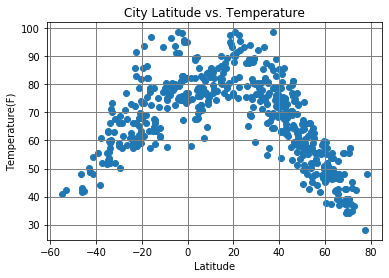

In [13]:
#Latitude vs Temperature

y = weather_data.Temp
x = weather_data.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f"City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.savefig('WeatherPy_Lat_vs_Temp.png')
plt.show()

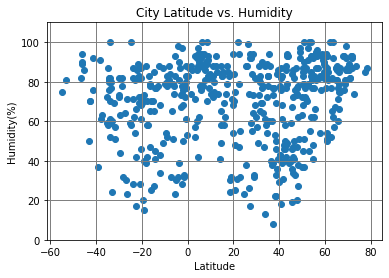

In [14]:
# Latitude vs Humidity

y = weather_data.Humidity
x = weather_data.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.ylim(0,110)
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.savefig('WeatherPy_Lat_vs_Humidity.png')
plt.show()

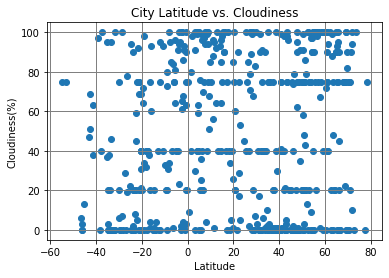

In [15]:
#Latitude vs Cloudiness

y = weather_data.Cloudiness
x = weather_data.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.savefig('WeatherPy_Lat_vs_Cloudiness.png')
plt.show()

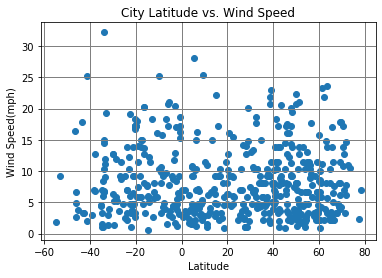

In [16]:
#Latitude vs. Wind Speed

y = weather_data['Wind Speed']
x = weather_data.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.savefig('WeatherPy_WindSpeed.vs.Lat.png')
plt.show()

### Linear Regression

In [17]:
northern_df = weather_data.loc[weather_data.Lat >= 0]
southern_df = weather_data.loc[weather_data.Lat < 0]
#northern_df
#southern_df

In [18]:
def north_linear_regression(x_values,y_values,x_label,y_label):
    x_values = northern_df[x_values]
    y_values = northern_df[y_values]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f'Northern_LR_{x_label}_vs_{y_label}.png')
    print(f"The r-squared is: {rvalue**2}")
    return plt.show()

In [19]:
def south_linear_regression(x_values,y_values,x_label,y_label):
    x_values = southern_df[x_values]
    y_values = southern_df[y_values]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,0),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f'Southern_LR_{x_label}_vs_{y_label}.png')
    print(f"The r-squared is: {rvalue**2}")
    return plt.show()

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.614789139831467


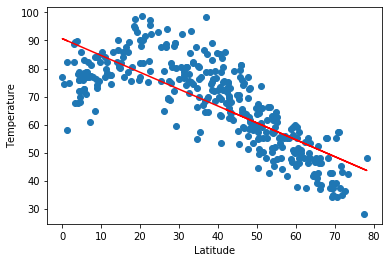

In [20]:
north_linear_regression('Lat','Temp','Latitude','Temperature')

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.595331408597173


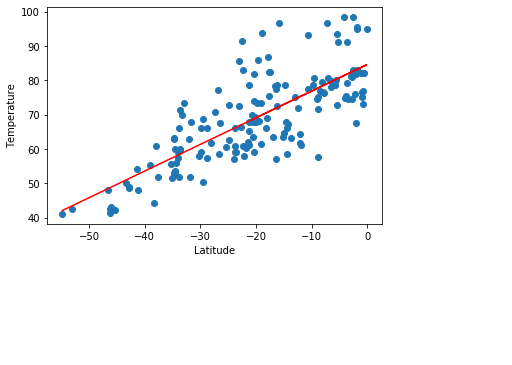

In [21]:
south_linear_regression('Lat','Temp','Latitude','Temperature')

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003640323528514629


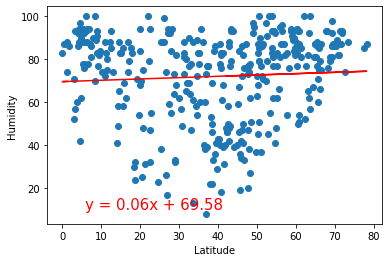

In [22]:
north_linear_regression('Lat','Humidity','Latitude','Humidity')

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008443479723944127


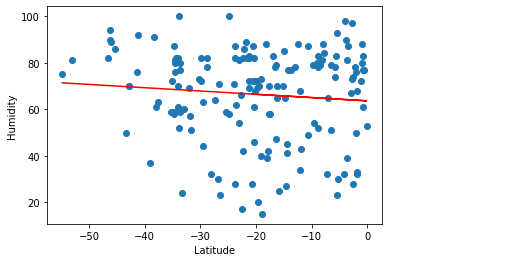

In [23]:
south_linear_regression('Lat','Humidity','Latitude','Humidity')

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 9.999225252176676e-06


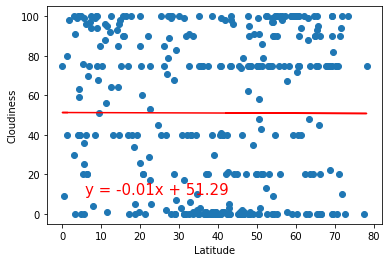

In [24]:
north_linear_regression('Lat','Cloudiness','Latitude','Cloudiness')

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06297529322935161


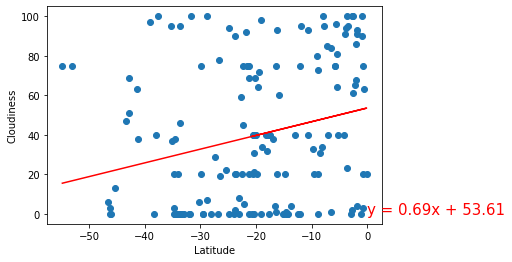

In [25]:
south_linear_regression('Lat','Cloudiness','Latitude','Cloudiness')

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.010561232096090627


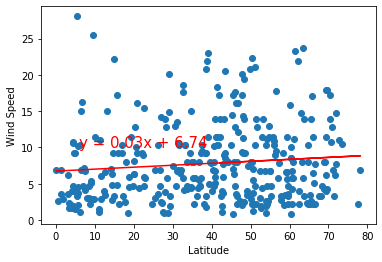

In [26]:
north_linear_regression('Lat','Wind Speed','Latitude','Wind Speed')

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.010125269149804736


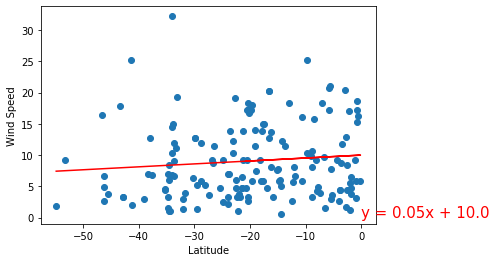

In [27]:
south_linear_regression('Lat','Wind Speed','Latitude','Wind Speed')